<a href="https://colab.research.google.com/github/rg81073/Exploratory_Data_Analysis_Machine_Learning/blob/main/House_Price_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'Price']

Importing the 'Housing Dataset' in to the Pandas DataFrame

In [3]:
house_price_dataframe = pd.read_csv('/content/housing.csv', header=None, delimiter=r"\s+",names=column_names)

In [4]:
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Knowing the nuber of Rows and columns in the DataFrame

In [5]:
house_price_dataframe.shape

(506, 14)

Check For the Missing Values in the DataFrame

In [6]:
house_price_dataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

Performing Statistical Measures on the DataFrame

In [7]:
house_price_dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Understanding the Correlation between Various features in the Dataset

1. Positive Correlation

2. Negative Correlation

In [8]:
correlation = house_price_dataframe.corr()

Constructing a Heatmap to understand the correlation

<Axes: >

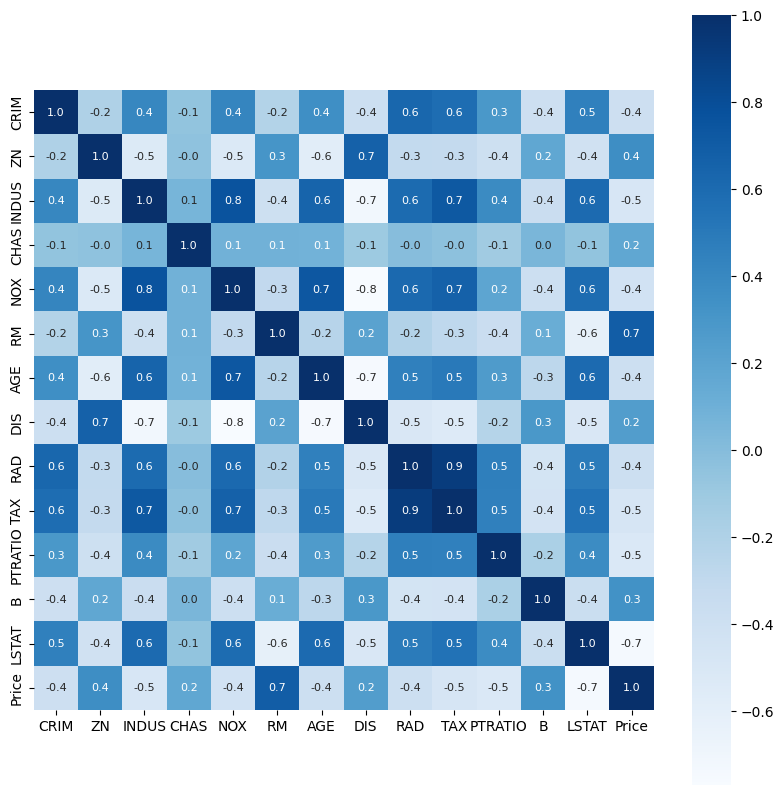

In [9]:
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Splitting the Data (all columns/features) and Target (price)

In [10]:
X = house_price_dataframe.drop(['Price'], axis=1)
Y = house_price_dataframe['Price']

In [11]:
print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

Splitting the data into Training and Test data

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state= 2)

In [13]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


Model Training

Using XGBoost Regressor Model

XGBoost (Extreme Gradient Boosting) Regressor is a popular machine learning algorithm used for regression tasks. It is an implementation of the gradient boosting framework that combines multiple weak prediction models (decision trees) to create a strong predictive model.

Here is a step-by-step explanation of how the XGBoost Regressor model works:

Data Preparation: Start by preparing your dataset, ensuring it is in the appropriate format. XGBoost accepts numerical features, so any categorical variables need to be encoded.

Ensemble Learning: XGBoost uses an ensemble learning approach, where multiple weak prediction models are combined to form a powerful model. Each weak model is a decision tree, and these trees are built sequentially.

Gradient Boosting: XGBoost uses gradient boosting, which means it optimizes the model's performance by minimizing a loss function. The model starts with an initial prediction and then calculates the residuals (difference between the predicted and actual values).

Building Decision Trees: XGBoost builds decision trees by recursively partitioning the data based on certain criteria. It aims to create trees with the best splits that minimize the loss function. The algorithm calculates the importance of each feature and determines the optimal split points.

Sequential Training: XGBoost trains decision trees in a sequential manner. Each new tree is built to correct the mistakes made by the previous trees. The algorithm continuously improves its predictions by learning from the residuals and updating the model with each new tree.

Regularization: XGBoost includes regularization techniques to prevent overfitting and improve generalization. Regularization parameters control the complexity of the model and help avoid excessive tree growth.

Prediction: Once the training is complete, the XGBoost Regressor can make predictions on new, unseen data. It combines the predictions from all the weak models (decision trees) using weighted averaging or summation.

Evaluation: Finally, evaluate the performance of the XGBoost Regressor using appropriate evaluation metrics such as mean squared error (MSE), mean absolute error (MAE), or R-squared. This helps assess the accuracy and generalization ability of the model.

XGBoost Regressor is known for its speed, scalability, and ability to handle complex datasets. It is widely used in various regression problems, including financial forecasting, customer churn prediction, and demand forecasting.

In [14]:
# Loading the Model

model = XGBRegressor()


In [15]:
# Training the Model with X_train

model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

## Evaluating the Trained Model:
Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared are commonly used evaluation metrics for regression models.

Mean Squared Error (MSE): MSE measures the average squared difference between the predicted values and the actual values in the dataset. It provides a measure of the model's accuracy by penalizing larger errors more heavily. The formula for MSE is:

MSE = (1/n) * Σ(y - ŷ)^2

where n is the number of data points, y is the actual value, and ŷ is the predicted value. The MSE value is always non-negative, with lower values indicating better model performance. However, it is sensitive to outliers.

Mean Absolute Error (MAE): MAE measures the average absolute difference between the predicted values and the actual values. Unlike MSE, MAE does not square the differences, making it less sensitive to outliers. The formula for MAE is:

MAE = (1/n) * Σ|y - ŷ|

MAE provides a straightforward interpretation as the average magnitude of the errors. Similar to MSE, lower MAE values indicate better model performance.

R-squared (Coefficient of Determination): R-squared is a statistical measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variables. It indicates how well the regression model fits the observed data. R-squared ranges from 0 to 1, where 0 indicates that the model does not explain any of the variability in the data, and 1 indicates a perfect fit. The formula for R-squared is:

R-squared = 1 - (SSres / SStot)

where SSres is the sum of squared residuals and SStot is the total sum of squares. Higher R-squared values indicate better model fit, but it is important to note that R-squared alone does not determine the model's validity.

These evaluation metrics help assess the performance and accuracy of regression models. MSE and MAE provide a measure of the prediction error, while R-squared indicates the proportion of variability explained by the model. It is common to use a combination of these metrics to gain a comprehensive understanding of the model's performance.



In [16]:
#  Predicting Accuracy on the training data
training_data_prediction = model.predict(X_train)

In [17]:
print(training_data_prediction)

[23.147501  20.99463   20.090284  34.69053   13.903663  13.510157
 21.998634  15.1940975 10.899711  22.709627  13.832816   5.592794
 29.810236  49.99096   34.89215   20.607384  23.351097  19.23555
 32.695698  19.641418  26.991022   8.401829  46.00729   21.708961
 27.062933  19.321356  19.288303  24.809872  22.61626   31.70493
 18.542515   8.697379  17.395294  23.700663  13.304856  10.492197
 12.688369  25.016556  19.67495   14.902088  24.193798  25.007143
 14.900281  16.995798  15.6009035 12.699232  24.51537   14.999952
 50.00104   17.525454  21.184624  31.998049  15.613355  22.89754
 19.325378  18.717896  23.301125  37.222923  30.09486   33.102703
 21.00072   49.999332  13.405827   5.0280113 16.492886   8.405072
 28.64328   19.499939  20.586452  45.402164  39.79833   33.407326
 19.83506   33.406372  25.271482  50.001534  12.521657  17.457413
 18.61758   22.602625  50.002117  23.801117  23.317268  23.087355
 41.700035  16.119293  31.620516  36.069206   7.0022025 20.3827
 19.996452  11.

In [18]:
# Now Comparing the predicted 'price' with the 'original price' using Evaluation Metrics for regression type problem:

# Using 'R- Squared Error'

score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Using 'Mean Absolute Error'

score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R- Squared Error: ", score_1)    # It should be less close to '0' for better model performance

print("Mean Absolute Error: ", score_2)  # It should be also be less for better model performance

R- Squared Error:  0.9999948236320982
Mean Absolute Error:  0.0145848437110976


Visualizing the Actual Prices and Predicted Prices on  " Training Dataset "

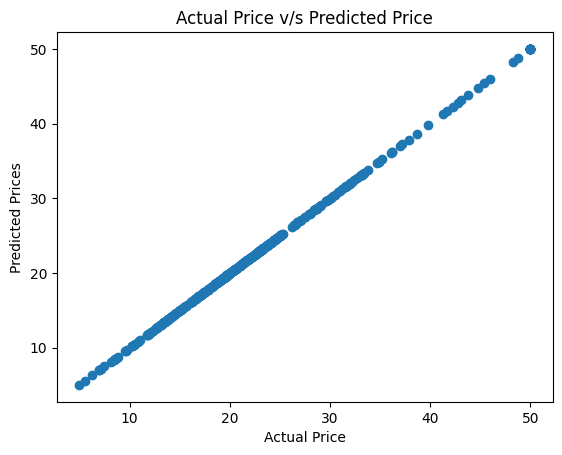

In [19]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual Price v/s Predicted Price")
plt.show()

Evaluation and Prediction of Model with the Test Data

In [20]:
#  Predicting Accuracy on the test data
test_data_prediction = model.predict(X_test)

In [21]:
print(test_data_prediction)

[20.288406  20.60247   30.9758    29.910797   8.624953  14.235525
 23.523052  29.730324  31.97293   22.015892  27.946804  24.034412
 20.771402  21.849985  12.024127  22.074675  18.487509  11.052485
  8.141267  15.730722  23.163914  20.233883  35.700928  19.041637
 15.129744  20.228016  47.067314  30.426474  32.729023  17.345776
 17.889462  19.40687   30.769133  25.431686  12.05332   17.900238
 11.031679  21.109531  20.64321   21.982754  25.016281  12.648555
 31.042107   7.106914  18.685764  14.380013  34.902393  16.130005
 32.98537   10.950912  27.335018  29.399937   7.0065055 35.398712
 22.978228  18.582758  19.224293  20.003431  15.341814  22.38517
 19.077105  21.955967  18.91404   32.77595   32.76772   24.36317
 48.262913  23.385014  10.551914  22.664684  14.671612   8.881822
 16.700302  17.221045  26.204681  26.826794  21.590458  21.61216
 19.662537  23.533224  33.25156   17.105299  19.517323  29.344427
 48.885273  35.723255  18.257914  24.461905  27.235567  21.319864
 21.661198  2

Visualizing the Actual Prices and Predicted Prices on  " Test Dataset "

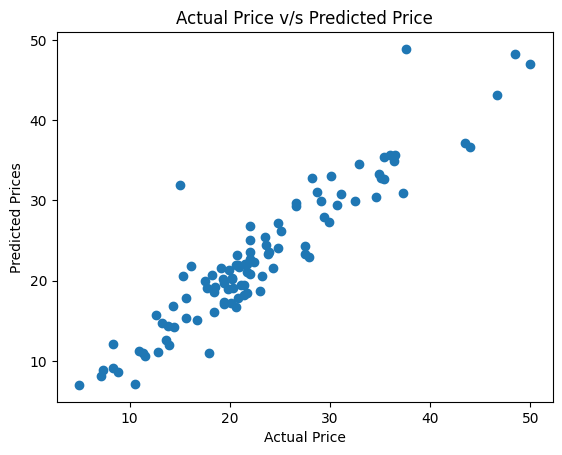

In [22]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual Price v/s Predicted Price")
plt.show()

In [23]:
# Using 'R- Squared Error'

score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Using 'Mean Absolute Error'

score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R- Squared Error: ", score_1)    # It should be less close to '0' for better model performance

print("Mean Absolute Error: ", score_2)  # It should be also be less for better model performance

R- Squared Error:  0.8711660369151691
Mean Absolute Error:  2.2834744154238233
